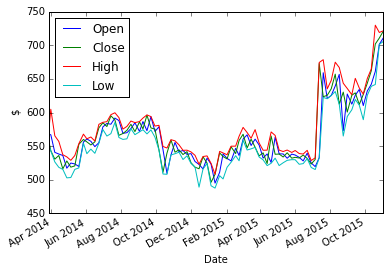

In [216]:
import pandas as pd

df = pd.DataFrame.from_csv('/Users/catherine/performance_prediction/data/goog_20100101_20151031.csv', parse_dates=True)
ax = df.plot(y=['Open', 'Close', 'High', 'Low'])

ax.set_ylabel('$')


In [226]:
import matplotlib.pyplot as plt
import numpy as np
import sys


def read_data(path):
    return np.genfromtxt(path, delimiter=",", names=True, unpack=True)


def get_x_values(data):
    return data['Date']


def get_y_values(data):
    return data['Close']


def get_training_data(data):
    num_rows = data.shape[0]
    rows_training = int(num_rows * .75)
    return data[:rows_training:]


def predict(f, data):
    x_new = np.linspace(0, len(get_x_values(data)), len(get_x_values(data)))
    y_new = f(x_new)
    return y_new


fitting to 63 rows


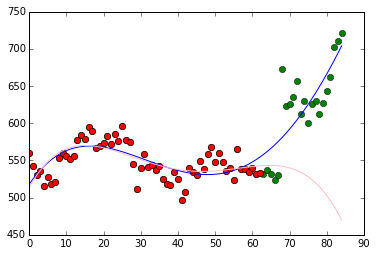

In [246]:
def fit_model_poly(data):
    x = np.linspace(0, len(get_x_values(data)), len(get_x_values(data)))
    y = get_y_values(data)
    # calculate polynomial
    z = np.polyfit(x, y, 4)
    f = np.poly1d(z)
    return f


def predict_poly(f, data):
    x_new = np.linspace(0, len(get_x_values(data)), len(get_x_values(data)))
    y_new = f(x_new)
    return y_new


data = read_data('/Users/catherine/performance_prediction/data/goog_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
model_subset = fit_model_poly(training_data)
fitted_subset_y_values = predict_poly(model_subset, data)
model_all = fit_model_poly(data)
fitted_all_y_values = predict_poly(model_all, data)
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink')
plt.show()


fitting to 63 rows


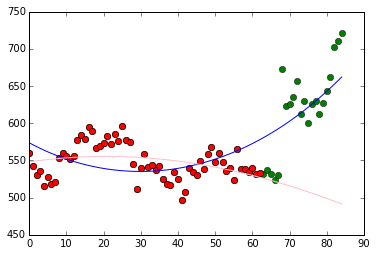

In [235]:
from lmfit import minimize, Parameters, report_fit

DEFAULT_KWARGS = {
    'amp': 10,
    'decay': 0.1,
    'shift': 0.0,
    'omega': 3.0
}


def get_x_range(data):
    return np.array(range(len(get_x_values(data))))


def get_params(kwargs):
    params = Parameters()
    for k, v in kwargs.items():
        params.add(k, value=v)
    return params


def fit_model_sin(data, default_params):
    x = get_x_range(data)
    y = get_y_values(data)
    return minimize(fcn2min, default_params, args=(x, y)).params


def fcn2min(params, x, y):
    return predict(params, x) - y


def predict_sin(params, x):
    amp = params['amp'].value
    shift = params['shift'].value
    omega = params['omega'].value
    decay = params['decay'].value
    y_values = amp * np.sin(x * omega + shift) * np.exp(-x * x * decay)
    return y_values


data = read_data('/Users/catherine/performance_prediction/data/goog_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
default_params = get_params(DEFAULT_KWARGS)
params_subset = fit_model_sin(training_data, default_params)
fitted_subset_y_values = predict_sin(params_subset, get_x_range(data))
params_all = fit_model_sin(data, default_params)
fitted_all_y_values = predict_sin(params_all, get_x_range(data))
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink'
         )
plt.show()


fitting to 619 rows


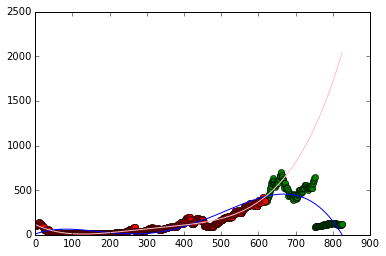

In [236]:
data = read_data('/Users/catherine/performance_prediction/data/aapl_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
model_subset = fit_model_poly(training_data)
fitted_subset_y_values = predict_poly(model_subset, data)
model_all = fit_model_poly(data)
fitted_all_y_values = predict_poly(model_all, data)
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink')

plt.show()

fitting to 619 rows


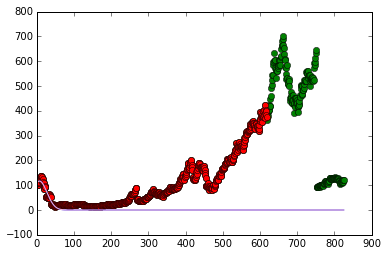

In [237]:
data = read_data('/Users/catherine/performance_prediction/data/aapl_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
default_params = get_params(DEFAULT_KWARGS)
params_subset = fit_model_sin(training_data, default_params)
fitted_subset_y_values = predict_sin(params_subset, get_x_range(data))
params_all = fit_model_sin(data, default_params)
fitted_all_y_values = predict_sin(params_all, get_x_range(data))
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink'
         )
plt.show()

fitting to 619 rows


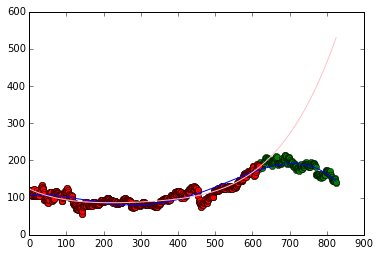

In [238]:
data = read_data('/Users/catherine/performance_prediction/data/ibm_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
model_subset = fit_model_poly(training_data)
fitted_subset_y_values = predict_poly(model_subset, data)
model_all = fit_model_poly(data)
fitted_all_y_values = predict_poly(model_all, data)
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink')

plt.show()

fitting to 619 rows


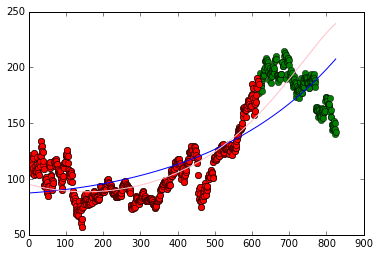

In [239]:
data = read_data('/Users/catherine/performance_prediction/data/ibm_20100101_20151031_sorted.csv')
training_data = get_training_data(data)
print("fitting to %d rows" % training_data.shape[0])
default_params = get_params(DEFAULT_KWARGS)
params_subset = fit_model_sin(training_data, default_params)
fitted_subset_y_values = predict_sin(params_subset, get_x_range(data))
params_all = fit_model_sin(data, default_params)
fitted_all_y_values = predict_sin(params_all, get_x_range(data))
plt.plot(range(len(get_x_values(data))), get_y_values(data), 'go',
         range(len(get_x_values(training_data))), get_y_values(training_data), 'ro',
         range(len(get_x_values(data))), fitted_all_y_values, 'b',
         range(len(get_x_values(data))), fitted_subset_y_values, 'pink'
         )
plt.show()